In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  


In [17]:
insurance_dataset = pd.read_csv("insurance.csv")


In [18]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Engina\AppData\Local\Temp\ipykernel_16048\3880032793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


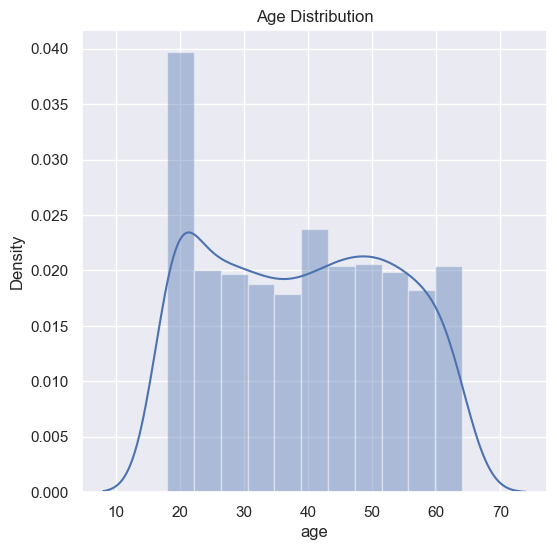

In [23]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()


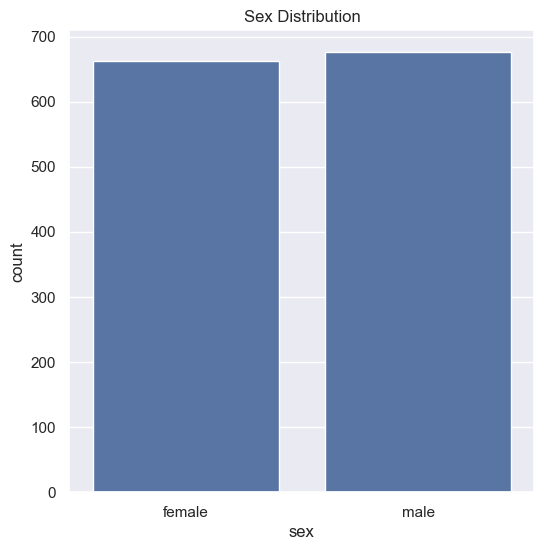

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [24]:

plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title("Sex Distribution")
plt.show()


plt.figure(figsize=(6,6))



In [25]:
insurance_dataset['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

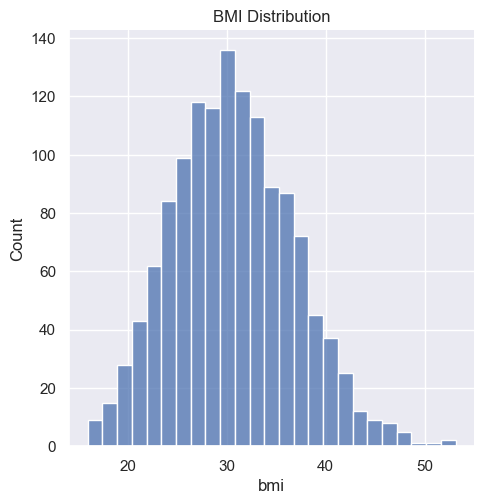

<Axes: xlabel='children', ylabel='count'>

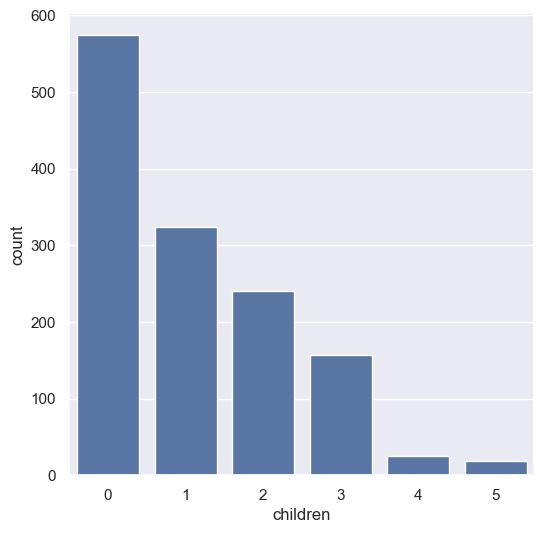

In [26]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title("BMI Distribution")
plt.show()


plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)



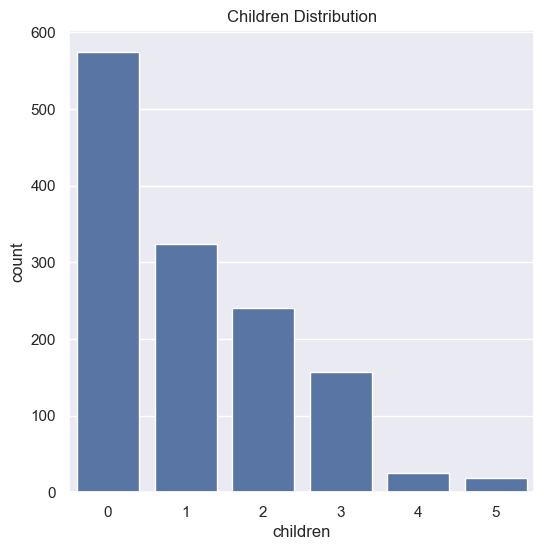

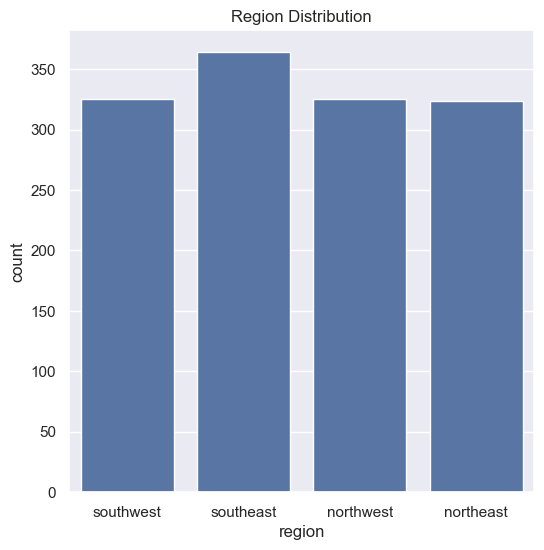

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title("Children Distribution")
plt.show()


plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title("Region Distribution")
plt.show()





In [28]:
insurance_dataset['region'].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

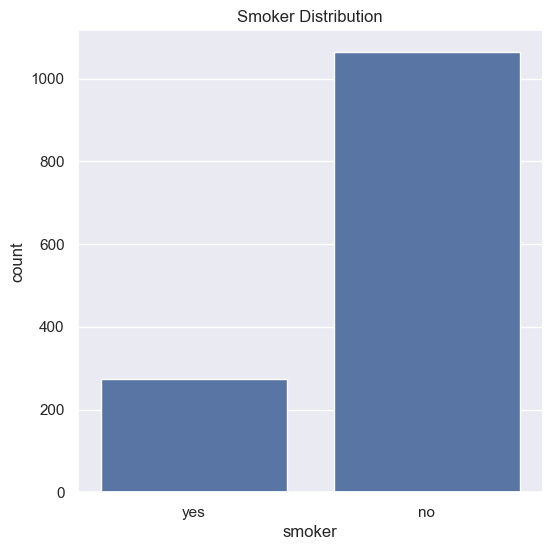

smoker
no     1064
yes     274
Name: count, dtype: int64

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title("Smoker Distribution")
plt.show()


insurance_dataset['smoker'].value_counts()




In [32]:
insurance_dataset.replace({'sex':{'male':0, 'female':1}, 'smoker':{'yes':1, 'no':0}}, inplace=True)

insurance_dataset.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)

insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)


In [33]:
X = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [38]:
print([X_test,X_train,y_test,y_train])


[      age  sex     bmi  children  smoker  region
17     23    0  23.845         0       0       2
1091   55    1  29.830         0       0       2
273    50    0  27.455         1       0       2
270    18    0  29.370         1       0       0
874    44    0  21.850         3       0       2
...   ...  ...     ...       ...     ...     ...
232    19    1  17.800         0       0       1
323    57    0  40.945         0       0       2
1337   61    1  29.070         0       1       3
1066   48    0  37.290         2       0       0
966    51    0  24.795         2       1       3

[268 rows x 6 columns],       age  sex     bmi  children  smoker  region
882    21    1  22.135         0       0       2
505    37    0  30.875         3       0       3
798    58    1  33.100         0       0       1
792    22    1  23.180         0       0       2
201    48    1  32.230         1       0       0
...   ...  ...     ...       ...     ...     ...
466    60    1  28.700         1       0   

In [39]:
# linear Regresion
regresson = LinearRegression( )

In [40]:
regresson.fit(X_train,y_train)

LinearRegression()

In [41]:
training_data_prediction = regresson.predict(X_train)

In [45]:
r2_train = metrics.r2_score(y_train, training_data_prediction)
print(r2_train)

# test data
test_data_prediction = regresson.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
print(r2_test)


0.751505643411174
0.7447273869684077


In [46]:
# Save the trained model to a file using pickle
import pickle

# Save the model
with open('insurance_model.pkl', 'wb') as model_file:
    pickle.dump(regresson, model_file)

print("Model saved successfully as 'insurance_model.pkl'")


Model saved successfully as 'insurance_model.pkl'
